# Clustering

La dataset Iris est un ensemble de données largement utilisé en apprentissage automatique et en analyse de données. Elle contient des mesures de la longueur et de la largeur des sépales ainsi que des pétales de 150 fleurs d'iris, réparties en trois espèces différentes : Iris setosa, Iris versicolor et Iris virginica. Les caractéristiques mesurées sont les suivantes :


1.  Longueur du sépale en centimètres.
2.Largeur du sépale en centimètres.
3.Longueur du pétale en centimètres.
4.Largeur du pétale en centimètres.



L'objectif de cet atelier est d'utiliser les mesures de longueur et de largeur des sépales et des pétales pour effectuer un clustering, c'est-à-dire regrouper les fleurs d'iris en fonction de leur similitude. Deux algorithmes de clustering sont utilisés dans cet atelier : K-means et Classification Ascendante Hiérarchique (CAH).


*   **K-means :** C'est un algorithme de clustering qui attribue automatiquement les données à un nombre prédéfini de clusters en minimisant la distance entre les données et les centroïdes des clusters. L'objectif est de former des groupes compacts et bien séparés.

*   **Classification Ascendante Hiérarchique (CAH) :** C'est un autre algorithme de clustering qui construit une hiérarchie de clusters en fusionnant progressivement des groupes de données similaires. L'objectif est de former une structure arborescente de clusters qui peut être visualisée sous forme de dendrogramme, et de diviser finalement les données en un certain nombre de clusters.

L'objectif de cet atelier est donc de prévoir les groupes (clusters) qui séparent le mieux la dataset Iris en utilisant ces deux algorithmes, K-means et CAH, sur les mesures de longueur et de largeur des sépales et des pétales. L'objectif final est d'obtenir des groupes de fleurs similaires en fonction de leurs caractéristiques, ce qui peut aider à mieux comprendre les différences entre les espèces d'iris et à identifier d'éventuelles relations entre elles.

## Partie 1: Kmeans

1. Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics

2. Importation de la dataset

In [ ]:
# Chargement des données
iris = datasets.load_iris()
X = iris.data

3. Determination de la valeur optimale de K(nombre de clusters):\
Pour une gamme de valeurs de K (de 1 à 10), on implémente K-Means et pour chaque valeur, on calcule l'inertie intra-cluster (WCSS) qui est la somme des distances euclidiennes entre chaque point et son centroïde associé.
L'attribut « kmeans.inertia_ » retourne la valeur finale d'inertie intra-cluster de la méthode K-Means.


In [ ]:
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    tab.append(kmeans.inertia_)
tab

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.40900974025975,
 30.254686147186156,
 28.365226812661028]

4. Visualisation de la méthode de Elbow:

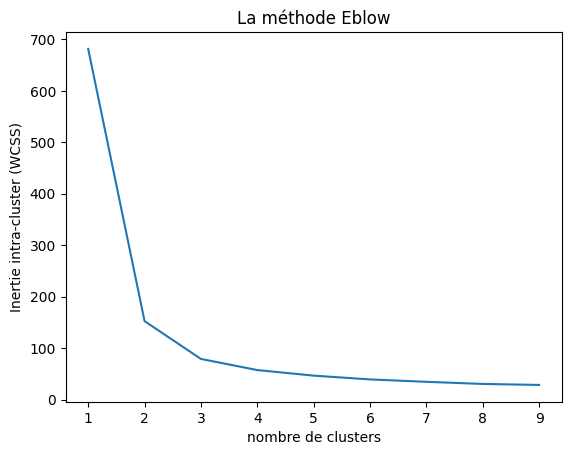

In [ ]:
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de clusters")
plt.ylabel("Inertie intra-cluster (WCSS)")
plt.show()

Dans le graphe, on peut observer que l'inertie intra-cluster diminue à mesure que le nombre de clusters augmente, ce qui est attendu car plus le nombre de clusters est élevé, plus les points seront regroupés de manière fine. Cependant, on peut également observer qu'il y a un point d'inflexion (un "coude") = 3 dans le graphique, où la décroissance de l'inertie ralentit.

 **Donc, le nombre oprimal de clusters serait 3.**

---



5. Visualisation des clusters:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


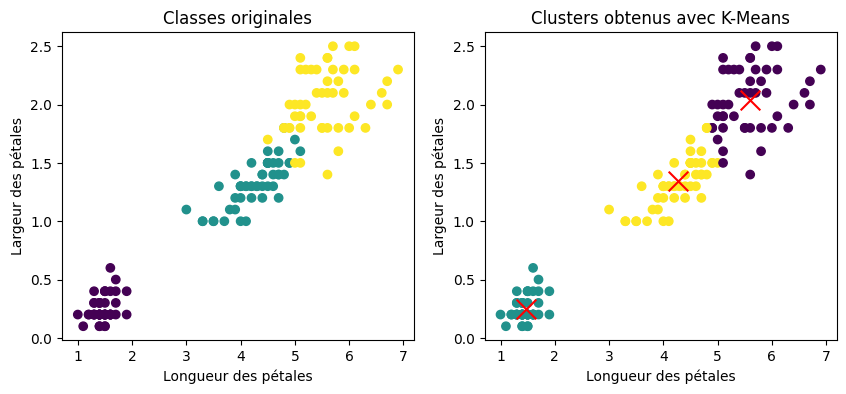

In [ ]:
X = iris.data[:, 2:]  # Extraction des caractéristiques (longueur et largeur des pétales)
y = iris.target  # Étiquettes de classe originales

# Application de K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Création de la figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Graphique 1 : Visualisation des données originales en fonction des classes
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axes[0].set_xlabel('Longueur des pétales')
axes[0].set_ylabel('Largeur des pétales')
axes[0].set_title('Classes originales')

# Graphique 2 : Visualisation des clusters obtenus avec K-Means
axes[1].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroïdes')
axes[1].set_xlabel('Longueur des pétales')
axes[1].set_ylabel('Largeur des pétales')
axes[1].set_title('Clusters obtenus avec K-Means')

plt.show()


En comparant les deux graphiques, on peut observer que les clusters obtenus par K-Means sont presque similaires aux classes originales, cela indique que l'algorithme a réussi à regrouper les données de manière appropriée.

6. Modification des paramètres par défaut:

Dans ce code, nous avons modifié les paramètres par défaut de K-Means en utilisant l'initiation k-means++ avec la méthode init='k-means++' et en spécifiant le nombre de fois où K-Means va initier les centres des clusters à 100 avec n_init=100. Ensuite, nous avons calculé l'indice de Rand ajusté en comparant les étiquettes de classe originales (y) avec les labels de cluster obtenus par K-Means (kmeans.labels_) en utilisant la fonction metrics.adjusted_rand_score(). L'indice de Rand ajusté mesure la similarité entre les partitions de clustering obtenues par K-Means et les étiquettes de classe originales, où une valeur proche de 1 indique une cohérence élevée entre les deux.

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=100, init='k-means++').fit(X)
metrics.adjusted_rand_score(kmeans.predict(X),iris.target)

0.8856970310281228

# Travail demandé

# Init = « k-means++ »

In [ ]:
adjusted_rand_indices = []  # Liste pour stocker les indices de Rand ajustés

# Boucle pour effectuer K-Means avec n_init = 1 et init = 'k-means++' pour 10 essais
for i in range(10):
    kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1)  # Utilisation de l'initiation k-means++ et 1 initialisation
    kmeans.fit(X)
    adjusted_rand_index = metrics.adjusted_rand_score(kmeans.predict(X),iris.target)  # Calcul de l'indice de Rand ajusté
    adjusted_rand_indices.append(adjusted_rand_index)  # Ajout de l'indice de Rand ajusté à la liste

# Affichage des indices de Rand ajustés pour chaque essai
print("Indices de Rand ajustés pour {} essais :".format(10))
for i in range(10):
    print("Essai {}: {}".format(i+1, adjusted_rand_indices[i]))


Indices de Rand ajustés pour 10 essais :
Essai 1: 0.8509627406851713
Essai 2: 0.8856970310281228
Essai 3: 0.8856970310281228
Essai 4: 0.8509627406851713
Essai 5: 0.8509627406851713
Essai 6: 0.8856970310281228
Essai 7: 0.8509627406851713
Essai 8: 0.8509627406851713
Essai 9: 0.8509627406851713
Essai 10: 0.8509627406851713


Essai | Indice de Rand ajusté
----- | -----------------------
1     | 0.8509627406851713
2     | 0.8856970310281228
3     | 0.8856970310281228
4     | 0.8509627406851713
5     | 0.8509627406851713
6     | 0.8856970310281228
7     | 0.8509627406851713
8     | 0.8509627406851713
9     | 0.8509627406851713
10    | 0.8509627406851713


# Init = random

In [ ]:
adjusted_rand_indices = []  # Liste pour stocker les indices de Rand ajustés

# Boucle pour effectuer K-Means avec n_init = 1 et init = 'k-means++' pour 10 essais
for i in range(10):
    kmeans = KMeans(n_clusters=3, init='random', n_init=1)  # Utilisation de l'initiation k-means++ et 1 initialisation
    kmeans.fit(X)
    adjusted_rand_index = metrics.adjusted_rand_score(kmeans.predict(X),iris.target)  # Calcul de l'indice de Rand ajusté
    adjusted_rand_indices.append(adjusted_rand_index)  # Ajout de l'indice de Rand ajusté à la liste

# Affichage des indices de Rand ajustés pour chaque essai
print("Indices de Rand ajustés pour {} essais :".format(10))
for i in range(10):
    print("Essai {}: {}".format(i+1, adjusted_rand_indices[i]))


Indices de Rand ajustés pour 10 essais :
Essai 1: 0.8509627406851713
Essai 2: 0.8509627406851713
Essai 3: 0.8509627406851713
Essai 4: 0.8856970310281228
Essai 5: 0.8856970310281228
Essai 6: 0.8509627406851713
Essai 7: 0.8509627406851713
Essai 8: 0.8856970310281228
Essai 9: 0.8856970310281228
Essai 10: 0.8509627406851713


| Essai | Indice de Rand ajusté |
|-------|-----------------------|
| 1     | 0.8509627406851713   |
| 2     | 0.8509627406851713   |
| 3     | 0.8509627406851713   |
| 4     | 0.8856970310281228   |
| 5     | 0.8856970310281228   |
| 6     | 0.8509627406851713   |
| 7     | 0.8509627406851713   |
| 8     | 0.8856970310281228   |
| 9     | 0.8856970310281228   |
| 10    | 0.8509627406851713   |


On peut observer que les résultats des deux initialisations sont similaires, avec des valeurs d'Indice de Rand ajusté qui se situent dans une plage proche. Cependant, il y a quelques différences dans les valeurs d'Indice de Rand ajusté pour certains essais. Cela montre que le choix de l'initialisation peut avoir un impact sur les résultats de l'algorithme K-Means, bien que les différences soient généralement petites. L'initialisation "k-means++" est souvent préférée car elle tend à converger plus rapidement vers une solution optimale, tandis que l'initialisation "random" peut être plus sensible aux points de départ choisis au hasard et peut nécessiter plus d'itérations pour converger. Cependant, il est important de noter que les résultats peuvent varier en fonction du jeu de données spécifique et des paramètres de l'algorithme K-Means utilisés. 

# Partie 2: HAC

La HAC est un algorithme de regroupement qui agrège les données et/ou les 
groupes les plus proches à chaque itération, en construisant une hiérarchie de groupes. Cette hiérarchie peut être représentée sous la forme d'un dendrogramme, qui est un diagramme utilisé pour illustrer la structure arborescente des clusters générés par la HAC. 

1- Importation des librairies :

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

2- Implémentation de HAC :

In [ ]:
hac = AgglomerativeClustering()
hac = hac.fit(X)
print(hac.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


 Cela suggère que l'algorithme a identifié deux groupes distincts dans les données d'entrée, avec un groupe étant attribué au label 1 et l'autre groupe étant attribué au label 0.

3- Visualisation du dendrogramme :

La classe AgglomerativeClustering de la bibliothèque scikit-learn permet d'effectuer le clustering hiérarchique agglomératif. Voici un résumé des points importants :

1.   Les attributs "AgglomerativeClustering.children_" et "AgglomerativeClustering.distances_" fournissent des informations sur la structure hiérarchique de l'arbre de clustering résultant. "children_" donne les indices des nœuds enfants de chaque nœud, tandis que "distances_" donne les distances entre les nœuds fusionnés lors de la construction de l'arbre.

2.   Plusieurs méthodes de linkage sont disponibles pour déterminer la proximité entre les clusters dans le processus de fusion, notamment le linkage simple, le linkage complet, le linkage moyen et le linkage Ward. Chaque méthode utilise une mesure de distance différente pour déterminer la similarité entre les clusters.

3.   Le linkage simple utilise la distance minimale entre les points des clusters fusionnés, le linkage complet utilise la distance maximale, le linkage moyen utilise la moyenne des distances, et le linkage Ward vise à minimiser la variance intra-cluster et maximiser la variance inter-cluster.

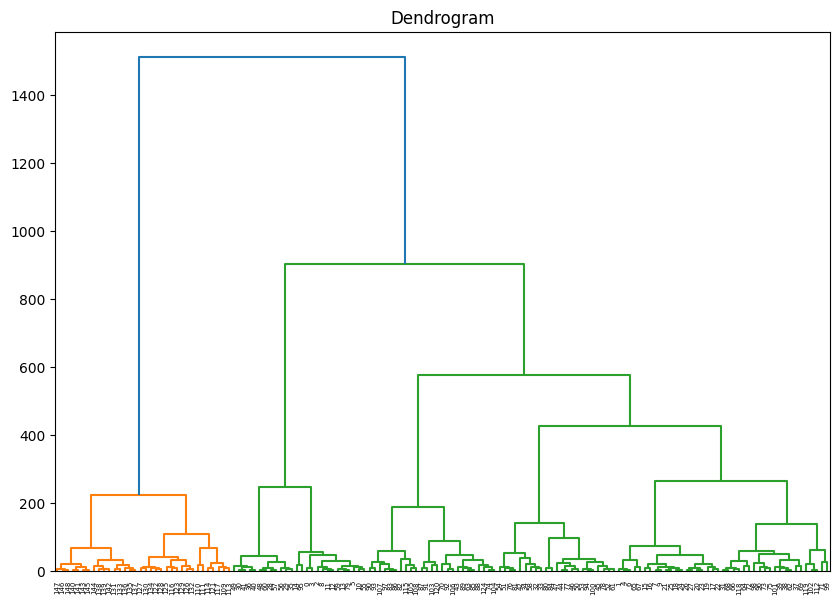

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
linkage_matrix = linkage(hac.children_, 'ward')
dendrogram = sch.dendrogram(linkage_matrix)
plt.show()

Pour améliorer l’affichage du dendrogramme, c’est possible de définir d’autres paramètres pour la 
fonction « plot_dendrogram ». Le paramètre « truncate_mode » est utilisé pour rendre le dendrogramme 
plus lisible, on utilise le mode 'level' qui limite le nombre de niveaux du dendrogramme qui seront 
affichés. Ce nombre est définit par le paramètre « p ».

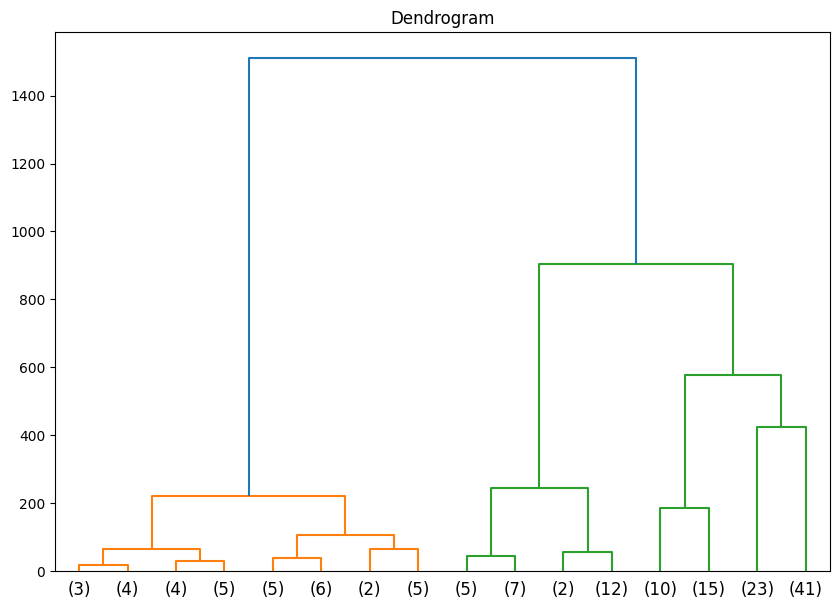

In [ ]:
hac = AgglomerativeClustering(n_clusters=3)
hac.fit(X)
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
linkage_matrix = linkage(hac.children_, 'ward')
dendrogram = sch.dendrogram(linkage_matrix,truncate_mode='level', p=3)
plt.show()

Le dendrogramme obtenu représente la structure hiérarchique de l'arbre de clustering avec les clusters fusionnés à différents niveaux de hauteur, ce qui permet d'observer la formation des clusters et de choisir le nombre optimal de clusters en fonction de la hauteur à laquelle les clusters sont fusionnés.

4- Modification des paramètres par défaut :

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# List of different combinations of linkage and affinity
combinations = [['ward', 'euclidean', None],
               ['complete', 'euclidean', None],
               ['average', 'euclidean', None],
               ['single', 'euclidean', None],
               ['complete', 'manhattan', None],
               ['average', 'manhattan', None],
               ['single', 'manhattan', None],
               ['complete', 'l1', None],
               ['average', 'l1', None],
               ['single', 'l1', None]]

# Loop through the combinations and calculate adjusted Rand index values
for combination in combinations:
    linkage, affinity, _ = combination
    
    # Initialize AgglomerativeClustering with current combination of linkage and affinity
    hac = AgglomerativeClustering(n_clusters=3, linkage=linkage, affinity=affinity)
    hac.fit(X)
    labels = hac.labels_
    
    # Calculate adjusted Rand index
    adjusted_rand_index = adjusted_rand_score(iris.target, labels)
    
    # Print the combination and its adjusted Rand index value
    print("Linkage: {}, Affinity: {}, Adjusted Rand Index: {}".format(linkage, affinity, adjusted_rand_index))


Linkage: ward, Affinity: euclidean, Adjusted Rand Index: 0.7311985567707746
Linkage: complete, Affinity: euclidean, Adjusted Rand Index: 0.6422512518362898
Linkage: average, Affinity: euclidean, Adjusted Rand Index: 0.7591987071071522
Linkage: single, Affinity: euclidean, Adjusted Rand Index: 0.5637510205230709
Linkage: complete, Affinity: manhattan, Adjusted Rand Index: 0.7322981167185344
Linkage: average, Affinity: manhattan, Adjusted Rand Index: 0.7445264308738749
Linkage: single, Affinity: manhattan, Adjusted Rand Index: 0.5657466140922338
Linkage: complete, Affinity: l1, Adjusted Rand Index: 0.7322981167185344
Linkage: average, Affinity: l1, Adjusted Rand Index: 0.7445264308738749
Linkage: single, Affinity: l1, Adjusted Rand Index: 0.5657466140922338


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

| Linkage | Affinity | Adjusted Rand Index |
|---------|----------|---------------------|
| ward    | euclidean| 0.7311985567707746 |
| complete| euclidean| 0.6422512518362898 |
| average | euclidean| 0.7591987071071522 |
| single  | euclidean| 0.5637510205230709 |
| complete| manhattan| 0.7322981167185344 |
| average | manhattan| 0.7445264308738749 |
| single  | manhattan| 0.5657466140922338 |
| complete| l1       | 0.7322981167185344 |
| average | l1       | 0.7445264308738749 |
| single  | l1       | 0.5657466140922338 |


Les valeurs d'indice de Rand ajusté plus proches de 1 indiquent une meilleure similarité entre les groupements obtenus et les vraies étiquettes, tandis que des valeurs proches de 0 indiquent une similarité aléatoire et des valeurs négatives indiquent une dissimilarité entre les groupements obtenus et les vraies étiquettes. Dans notre cas, les meilleurs résultats étaient obtenus par mun linkage = 'average' et affiity = 'l1' ainsi qu'avec linkage = 'average' et affinity = 'manhattan'.

Visualisation du dendrogramme pour linkage= « single » et linkage= « complete » en gardant les autres paramètres par défaut.

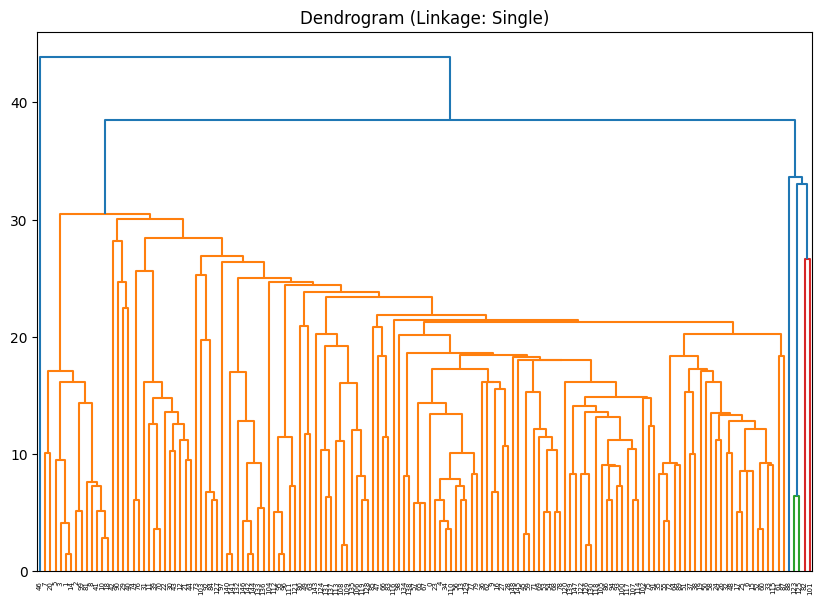

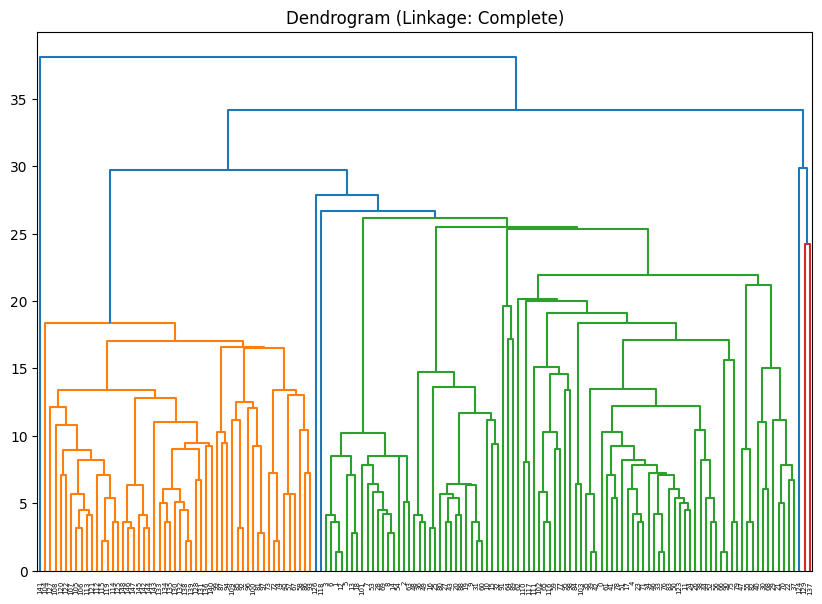

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Appliquer HAC avec linkage='single' et affinité='euclidean'
hac_single = AgglomerativeClustering(n_clusters=3, linkage='single')
hac_single.fit(X)

hac_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
hac_complete.fit(X)

# Obtenir la matrice de liaison pour chaque méthode de liaison
linkage_matrix_single = sch.linkage(hac_single.children_)
linkage_matrix_complete = sch.linkage(hac_complete.children_)

# Visualiser le dendrogramme pour linkage='single'
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Linkage: Single)")
sch.dendrogram(linkage_matrix_single)
plt.show()

# Visualiser le dendrogramme pour linkage='complete'
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Linkage: Complete)")
sch.dendrogram(linkage_matrix_complete)
plt.show()
